# Imports


In [10]:
%pip install -q seaborn
import tensorflow as tf
import numpy as np
import zipfile
import pandas as pd
from tensorflow.keras import layers
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.random import seed
seed(69420)
tf.keras.utils.set_random_seed(69420)

tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Note: you may need to restart the kernel to use updated packages.
Num GPUs Available:  0


# Preparation Stuff

In [2]:
# pretrain_features = pd.read_csv(r'content\pretrain_features.csv') #takes an eternity
# pretrain_labels = pd.read_csv(r'content\pretrain_labels.csv') #gives GAP
# test_features = pd.read_csv(r'content\test_features.csv')
# train_features = pd.read_csv(r'content\train_features.csv')
# train_labels = pd.read_csv(r'content\train_labels.csv')

In [3]:
# from rdkit import Chem
# from rdkit.DataStructs.cDataStructs import BitVectToText

# fp_ptrain = np.asarray([np.asarray(list(BitVectToText(Chem.RDKFingerprint(Chem.MolFromSmiles(x)))), dtype=np.float32) for x in pretrain_features['smiles'].tolist()])
# fp_train = np.asarray([np.asarray(list(BitVectToText(Chem.RDKFingerprint(Chem.MolFromSmiles(x)))), dtype=np.float32) for x in train_features['smiles'].tolist()])
# fp_test = np.asarray([np.asarray(list(BitVectToText(Chem.RDKFingerprint(Chem.MolFromSmiles(x)))), dtype=np.float32) for x in test_features['smiles'].tolist()])

In [4]:
# train_features.drop(columns=['Id','smiles'],inplace=True)
# train_labels.drop(columns=['Id'],inplace = True)

In [5]:
# pretrain_features.drop(columns=['Id','smiles'],inplace=True)
# pretrain_labels.drop(columns=['Id'],inplace = True)


In [6]:
# test_ids = test_features.loc[:,'Id']
# test_features.drop(columns=['Id','smiles'],inplace=True)



In [7]:
# pretrain_features = pd.concat([pretrain_features,pd.DataFrame(fp_ptrain)],axis = 1)
# train_features =pd.concat([train_features,pd.DataFrame(fp_train)],axis = 1)
# test_features =pd.concat([test_features,pd.DataFrame(fp_test)],axis = 1)

# test_features.head()


In [8]:
# pretrain_features.to_csv("pretrain_features_extended.csv",index=False)
# train_features.to_csv("train_features_extended.csv",index=False)
# test_features.to_csv("test_features_extended.csv",index=False)

# Pretrained Algorithm

In [9]:
pretrain_features = pd.read_csv(r'pretrain_features_extended.csv') #takes an eternity
pretrain_labels = pd.read_csv(r'content\pretrain_labels.csv') #gives GAP
test_features = pd.read_csv(r'test_features_extended.csv')
train_features = pd.read_csv(r'train_features_extended.csv')
train_labels = pd.read_csv(r'content\train_labels.csv')
test_features_original = pd.read_csv(r'content\test_features.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
test_ids = test_features_original.loc[:,'Id']
train_labels.drop(columns=['Id'],inplace = True)
pretrain_labels.drop(columns=['Id'],inplace = True)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Lumo_Energy]')
  plt.legend()
  plt.grid(True)

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      # layers.Dense(64, activation='relu'),
      # layers.Dropout(0.4),
      # layers.Dense(64, activation='relu'),
      # layers.Dense(64, activation="softmax"),
      # layers.Dense(32, activation='relu'),
      # layers.Dense(1)
      layers.Dense(300, activation='tanh'),
      layers.Dense(300, activation='tanh'),
      layers.Dropout(0.4),
      layers.Dense(300, activation='tanh'),
      layers.Dense(300, activation='tanh'),
      layers.Dropout(0.4),
      layers.Dense(300, activation='tanh'),
      layers.Dense(300, activation='tanh'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

Epoch 1/100
1250/1250 [==============================] - 5s 3ms/step - loss: 0.0800 - val_loss: 0.0122
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0147 - val_loss: 0.0100
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0115 - val_loss: 0.0113
Epoch 4/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0106 - val_loss: 0.0086
Epoch 5/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0101 - val_loss: 0.0104
Epoch 6/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0095 - val_loss: 0.0086
Epoch 7/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0207 - val_loss: 0.0190
Epoch 8/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0151 - val_loss: 0.0133
Epoch 9/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0134 - val_loss: 0.0118
Epoch 10/100
1250/1250 [==============================] - 4s 3ms/step - l

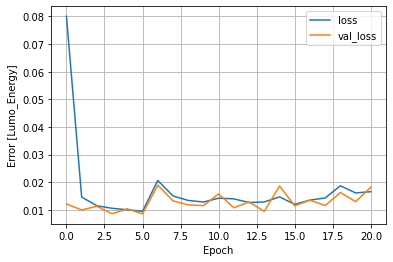

In [ ]:
from keras.callbacks import EarlyStopping

normalizer = tf.keras.layers.Normalization(axis=-1)
lumo_energy_model = build_and_compile_model(normalizer)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15, min_delta=0.00005, restore_best_weights=True)

history = lumo_energy_model.fit(
    pretrain_features,
    pretrain_labels,
    validation_split=0.2,
    verbose=1, epochs=100,
    callbacks=[es])

lumo_energy_model.summary()
plot_loss(history)


In [ ]:
# just debugging
# predictions = lumo_energy_model.predict(pretrain_features)
# np.savetxt('./predictionsPre.csv', predictions, fmt=('%f'),delimiter=',',header = "y",comments = '' )

# Transfer Learning

Epoch 1/300
3/3 [==============================] - 0s 65ms/step - loss: 4.5410 - val_loss: 0.3115
Epoch 2/300
3/3 [==============================] - 0s 13ms/step - loss: 1.1240 - val_loss: 0.6576
Epoch 3/300
3/3 [==============================] - 0s 13ms/step - loss: 0.8052 - val_loss: 0.3852
Epoch 4/300
3/3 [==============================] - 0s 13ms/step - loss: 0.4931 - val_loss: 1.3411
Epoch 5/300
3/3 [==============================] - 0s 14ms/step - loss: 0.3879 - val_loss: 0.1065
Epoch 6/300
3/3 [==============================] - 0s 13ms/step - loss: 0.3940 - val_loss: 0.1096
Epoch 7/300
3/3 [==============================] - 0s 14ms/step - loss: 0.2683 - val_loss: 0.5523
Epoch 8/300
3/3 [==============================] - 0s 15ms/step - loss: 0.2203 - val_loss: 0.0848
Epoch 9/300
3/3 [==============================] - 0s 13ms/step - loss: 0.2922 - val_loss: 0.1098
Epoch 10/300
3/3 [==============================] - 0s 14ms/step - loss: 0.2563 - val_loss: 0.5270
Epoch 11/300
3/3 [=

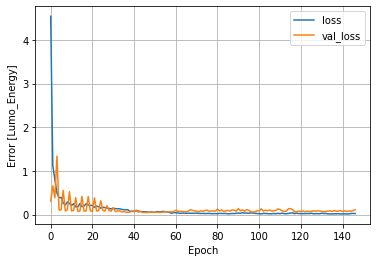

In [ ]:
lumo_energy_model.trainable = False
lumo_energy_model.pop()


input = keras.Input(shape=(3048))
pretrained = lumo_energy_model(input)
normalizer = layers.Normalization(axis=-1)(input)
concatenate = layers.concatenate([normalizer,pretrained],axis=1)
Dense1 = layers.Dense(300,activation='tanh')(concatenate)
Dense2 = layers.Dense(300,activation='tanh')(Dense1)
dropout1 = layers.Dropout(0.4)(Dense2)
Dense3 = layers.Dense(300,activation='tanh')(dropout1)
Dense4 = layers.Dense(300,activation='tanh')(Dense3)
dropout2 = layers.Dropout(0.4)(Dense4)
Dense5 = layers.Dense(300,activation='tanh')(dropout2)
Dense6 = layers.Dense(300,activation='tanh')(Dense5)
output = layers.Dense(1)(Dense6)

homo_lumo_gap_model = keras.Model(inputs = input,outputs = output)

homo_lumo_gap_model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, min_delta=0.00005, restore_best_weights=True)

history2 = homo_lumo_gap_model.fit(
    train_features,
    train_labels,
    validation_split=0.1,
    verbose=1, epochs=300,
    callbacks = [es])
homo_lumo_gap_model.summary()

plot_loss(history2)







In [ ]:
# Debugging purpises
# predictions = homo_lumo_gap_model.predict(train_features)
# np.savetxt('./predictionsPre2.csv', predictions, fmt=('%f'),delimiter=',',header = "y",comments = '' )

# Fine-tuning

Epoch 1/1000
3/3 [==============================] - 1s 66ms/step - loss: 0.0543 - val_loss: 0.0566
Epoch 2/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0508 - val_loss: 0.0488
Epoch 3/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0514 - val_loss: 0.0645
Epoch 4/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0634 - val_loss: 0.0436
Epoch 5/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0652 - val_loss: 0.0460
Epoch 6/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0552 - val_loss: 0.0864
Epoch 7/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0568 - val_loss: 0.0426
Epoch 8/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0485 - val_loss: 0.0469
Epoch 9/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0467 - val_loss: 0.0416
Epoch 10/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0450 - val_loss: 0.0480
Epoch 11/

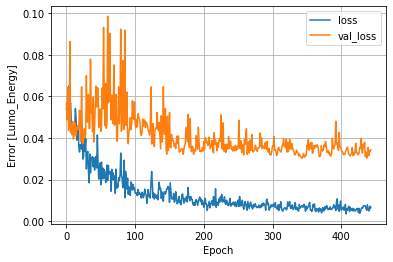

In [ ]:
lumo_energy_model.trainable = True
normalizer.trainable = False

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, min_delta=0.00005, restore_best_weights=True)

homo_lumo_gap_model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.0001)) #low learning rate
history3 = homo_lumo_gap_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=1000,
    callbacks = [es])
homo_lumo_gap_model.summary()
plot_loss(history3)
                

# Prediction

In [ ]:
predictions = homo_lumo_gap_model.predict(test_features)
predictions = np.squeeze(predictions)
predictions = np.column_stack((test_ids,predictions))
np.savetxt('./predictions.csv', predictions, fmt=('%i','%f'),delimiter=',',header = "Id,y",comments = '' )
print("=== finished ===")

=== finished ===
